# 数据处理例子：鸢尾花分类

## 加载数据集、查看数据

In [3]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# sampleX
print('feature names:\n', iris_dataset['feature_names'])
print('num of sample:\n', len(iris_dataset['data']))
print('data:\n', iris_dataset['data'][:10])

feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
num of sample:
 150
data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [15]:
# sampleY
print('target names:\n',iris_dataset['target_names'])
print('target: \n',iris_dataset['target'])

target names:
 ['setosa' 'versicolor' 'virginica']
target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 构造训练集、测试集

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=10)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
y_test shape:(38,)


## 数据分析

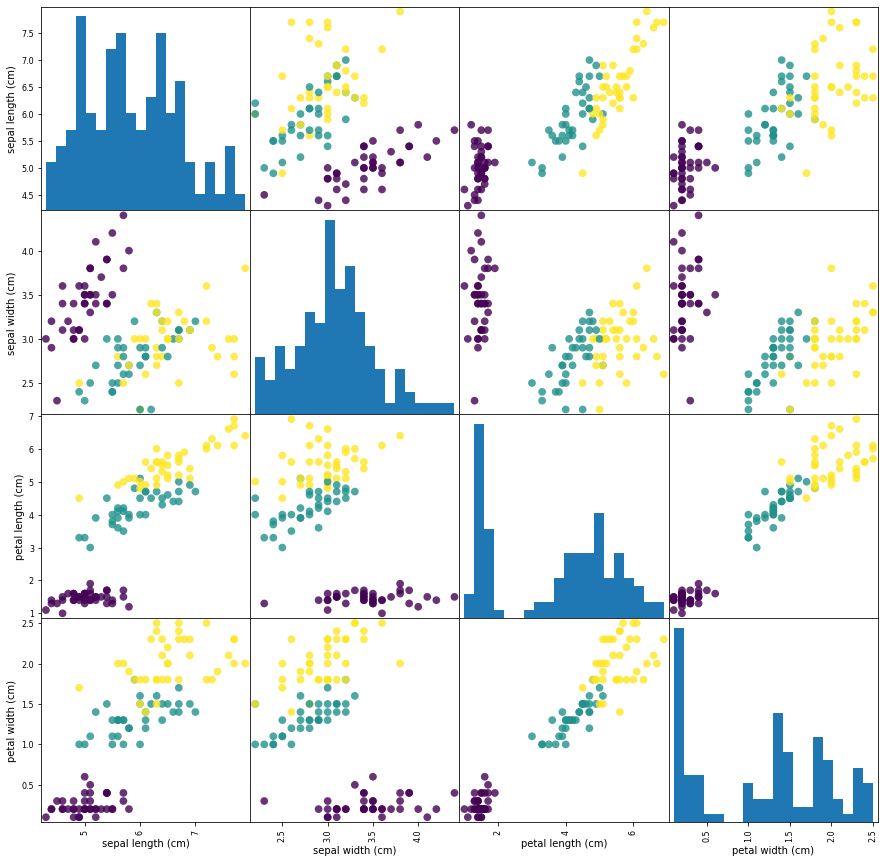

In [10]:
# 构造 DataFrame
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# 使用 pandas 内置函数绘制散点图矩阵
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                                 marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

## 使用KNN进行分类

### 加载KNN，并载入训练数据

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 预测新数据标签

In [55]:
import numpy as np
X_new = np.array([5, 2.9, 1, 0.2]).reshape(1,4)
print('X_new.shape:{}'.format(X_new.shape))

prediction = knn.predict(X_new)
print('predict y:', prediction)
print('predict label:', iris_dataset.target_names[prediction])

X_new.shape:(1, 4)
predict y: [0]
predict label: ['setosa']


### 预测测试集，计算精度

In [56]:
y_pred = knn.predict(X_test)
print('Test set predictions:', y_pred)
print('Test set acc :{:.2f}'.format(np.mean(y_pred == y_test)))

## 或者使用 knn内置的score方法
print('Test set acc :{:.2f}'.format(knn.score(X_test, y_test)))

Test set predictions: [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
Test set acc :0.97
Test set acc :0.97
